## Importing Packages and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import scipy.stats as stats
sns.set(color_codes=True)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Importing Dataset to Jupyter Notebooks

In [2]:
DataSet = pd.read_csv("D:\McCombs Data Analytics Course\Jupyter Notebook Files\Proj 2 - Business Stats\AxisInsurance.csv")

## Problem Definition
<u><b> OBJECTIVE </b></u>
- Statistical Analysis of Business Data. <br>
- Explore the dataset and extract insights from the data using EDA. <br>

<u><b> QUESTIONS / FURTHER EXPLORATION </b></u>
- (1) Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?
- (2) Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.
- (3) Is the proportion of smokers significantly different across different regions?
- (4) Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.




## Basic Information on the Attributes in the DataSet

<u><b> TYPES OF ATTRIBUTES </b></u>

In [3]:
DataSet.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

There are 3 attributes of type OBJECT (Strings). <br>
There are 2 attributes of type INTEGER. <br>
There are 2 attributes of type FLOAT. <br>
TOTAL : 7 Attributes. <br>

<u><b> ANY MISSING VALUES IN THE DATASET? </b></u>

In [4]:
DataSet.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No Missing Values in the DataSet

<u><b> SUMMARIZED DATASET </b></u>

In [5]:
DataSet.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [12]:
print("Unique Values of Sex - ")
print(DataSet["sex"].unique())
print("Unique Values of Smoker - ")
print(DataSet["smoker"].unique())
print("Unique Values of Region - ")
print(DataSet["region"].unique())

Unique Values of Sex - 
['female' 'male']
Unique Values of Smoker - 
['yes' 'no']
Unique Values of Region - 
['southwest' 'southeast' 'northwest' 'northeast']


##### Observations
- The DataSet contains information on 1338 people. <br>
- Age ranges from 18 to 64 years with the average around 39 years. <br>
- There are 2 subdivisions in Sex (Male and Female) and Smoker (Yes or No). <br>
- The BMI ranges from 15.96 to 53.13 with the average around 30.66. <br>
- Number of Children varies from 0 to 5 with average around 1. <br>
- Region takes up four unique values based on the 4 regions in the US (northeast, southeast, southwest, or northwest). <br>
- Charges range from 1121.87 dollars to 63,770.43 dollars with the average around 13,270.42 dollars.<br>

<u><b> DIMENSIONS OF THE  DATASET (ROWS AND COLUMNS) </b></u>

In [1]:
DataSet.shape

NameError: name 'DataSet' is not defined

There are 1338 rows and 7 columns

<u><b> CORRELATIONS BETWEEN ATTRIBUTES </b></u>

In [25]:
DataSet.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<u><b> SKEWNESS IN THE DATASET </b></u>

In [26]:
DataSet.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

## Univariate Analysis of Variables

<u><b> HISTOGRAM PLOT OF NUMERICAL VARIABLES TO SHOW DISTRIBUTION </b></u>

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

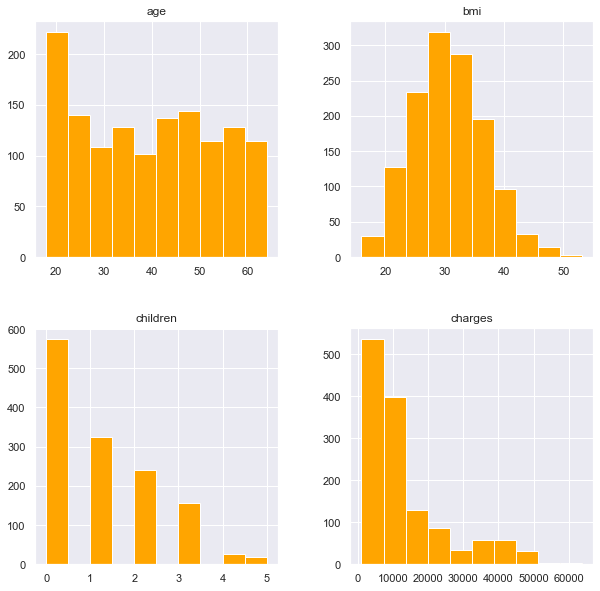

In [27]:
DataSet.hist(figsize=(10,10), color = 'orange')

Histogram Plots of the various numerical Attributes present in the given Dataset. It shows the frequency of each element within the attribute. <br>
##### Observations
- Age has the maximum concentration in the range of 20 to 30 years, implying that most customers are in that age range. <br>
- Most people have a BMI in the late 20's and early 30's.
- A Large number of people have no children with very few having over 3 children.
- Most charges are in the range of 0 - 20,000 dollars; with comparatively less cases above that range. 

<u><b> AGE DISTRIBUTION </b></u>

<AxesSubplot:xlabel='age'>

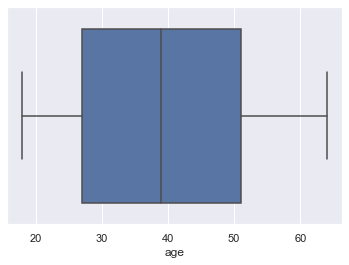

In [29]:
sns.boxplot(DataSet['age'])

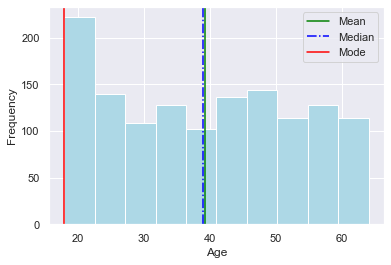

In [33]:
plt.hist(DataSet['age'], color = 'lightblue')
plt.axvline(DataSet['age'].mean(), color = 'green', label = 'Mean')
plt.axvline(DataSet['age'].median(), color = 'blue', label = 'Median', linestyle = 'dashdot')
plt.axvline(DataSet['age'].mode()[0], color = 'red', label = 'Mode')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

<AxesSubplot:xlabel='age', ylabel='count'>

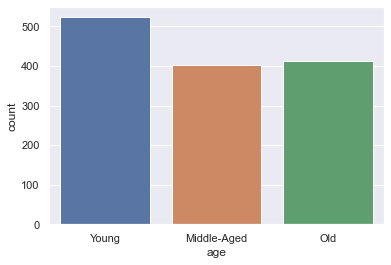

In [221]:
bins=np.linspace(min(DataSet['age']),max(DataSet['age']),4)
grp_names=['Young','Middle-Aged','Old']
Data['Age-Bin'] = pd.cut(DataSet['age'],bins,labels=grp_names,include_lowest=True)
sns.countplot(Data['Age-Bin'])


##### Observations
- The Mean and Median and relatively close values averaging at 39 although, a large chunk of the population is in their 20's. Age attribute has no outliers. 
- The DataSet has a higher concentration of Young Policy Holders with Middle-Aged and Old policyholders having relatively the same concentration

<u><b> BMI DISTRIBUTION </b></u>

<AxesSubplot:xlabel='bmi'>

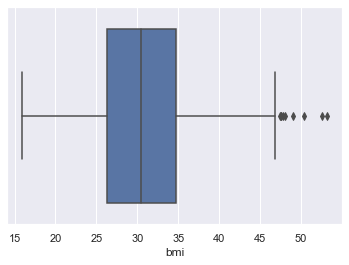

In [40]:
sns.boxplot(DataSet['bmi'])

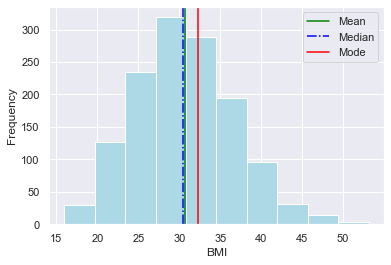

In [41]:
plt.hist(DataSet['bmi'], color = 'lightblue')
plt.axvline(DataSet['bmi'].mean(), color = 'green', label = 'Mean')
plt.axvline(DataSet['bmi'].median(), color = 'blue', label = 'Median', linestyle = 'dashdot')
plt.axvline(DataSet['bmi'].mode()[0], color = 'red', label = 'Mode')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()

##### Observations
The Mean and Median and relatively close values averaging at 30 with a large chunk of the population lying in the range 25 - 35. The BMI attribute also has a few outliers.

<u><b> CHARGES DISTRIBUTION </b></u>

<AxesSubplot:xlabel='charges'>

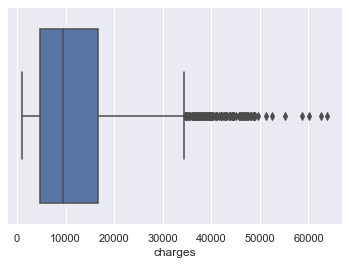

In [65]:
sns.boxplot(DataSet['charges'])

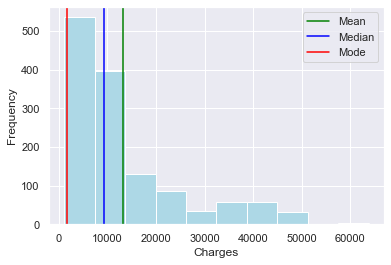

In [68]:
plt.hist(DataSet['charges'], color = 'lightblue')
plt.axvline(DataSet['charges'].mean(), color = 'green', label = 'Mean')
plt.axvline(DataSet['charges'].median(), color = 'blue', label = 'Median')
plt.axvline(DataSet['charges'].mode()[0], color = 'red', label = 'Mode')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.legend()

##### Observations
A large chunk of the population in the dataset is concentrated in the 0 - 15000 range. Comparatively, very few people lie above this range. The attribute Charges has a lot of outliers.

<u><b> SEX DISTRIBUTION </b></u>

<AxesSubplot:ylabel='sex'>

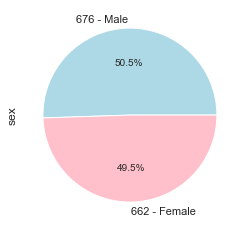

In [42]:
df1 = DataSet['sex'].value_counts()
SexDist = ['676 - Male', '662 - Female']
clr2 = ['lightblue','pink']
df1.plot.pie(autopct='%1.1f%%', colors = clr2, labels = SexDist)

##### Observations
The Dataset is almost evenly distributed between Male and Female with Male leading only by a very small margin

<u><b> CHILDREN DISTRIBUTION </b></u>

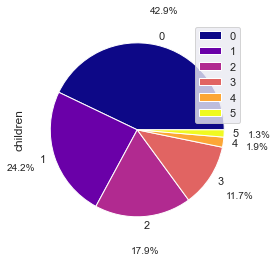

In [51]:
df2 = DataSet['children'].value_counts()
labels1 = ['0','1','2','3','4','5']
df2.plot.pie(cmap = 'plasma', autopct='%2.1f%%', pctdistance = 1.4)
plt.legend(labels1,loc = "upper right")

##### Observations
Most people have no children. Almost 50% of the population has 1, 2 or 3 kids. Less than 4% have 4 or 5 kids.

<u><b> SMOKER DISTRIBUTION </b></u>

<AxesSubplot:ylabel='smoker'>

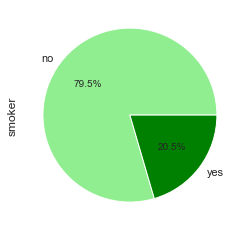

In [55]:
df3 = DataSet['smoker'].value_counts()
clr3 = ['lightgreen','green']
df3.plot.pie(colors = clr3, autopct='%2.1f%%')

##### Observations
Almost 80 percent of the people in the dataset do not smoke. Only 20% do.

<u><b> REGION DISTRIBUTION </b></u>

<AxesSubplot:ylabel='region'>

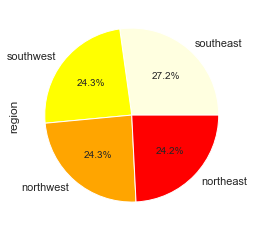

In [62]:
df4 = DataSet['region'].value_counts()
clr4 = ['lightyellow','yellow','orange','red']
df4.plot.pie(colors = clr4, autopct='%2.1f%%')

##### Observations
The entire dataset seems to be evenly distributed amongst the 4 regions. South - East leads by a very small margin of approximately 3 percent. 

## Bivariate Analysis of Variables

<u><b> HEAT MAP SHOWING CORRELATION BETWEEN VARIABLES </b></u>

<AxesSubplot:>

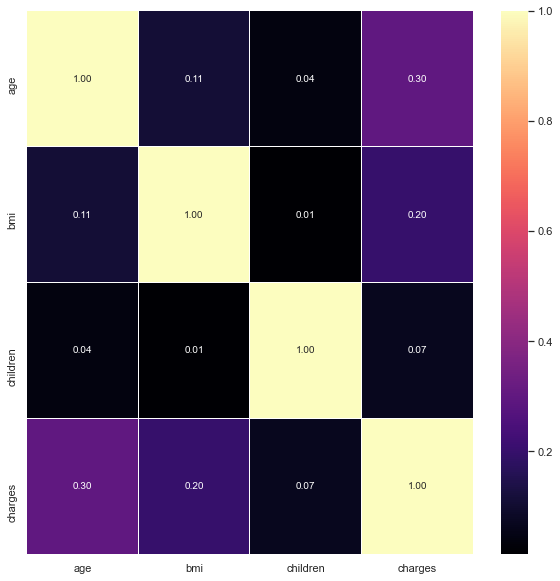

In [69]:
fig, ax=plt.subplots(figsize=(10,10))
sns.heatmap(DataSet.corr(), ax=ax, annot = True, linewidths = 0.05, fmt = '.2f', cmap="magma")

##### Observations
This Heat Map shows the correlation between the individual attributes. With this we can draw the following inferences : 
1) There is very little to negligible correlation between the attributes of this dataset. <br>
2) The Highest Correlation is between 'Charges' and 'Age' with 0.30.<br>
3) The Lowest Correlation is between 'BMI' and 'Children' with 0.01.<br>
4) These atrributes are mostly independent.<br>

<u><b> PAIRPLOT BETWEEN VARIABLES </b></u>

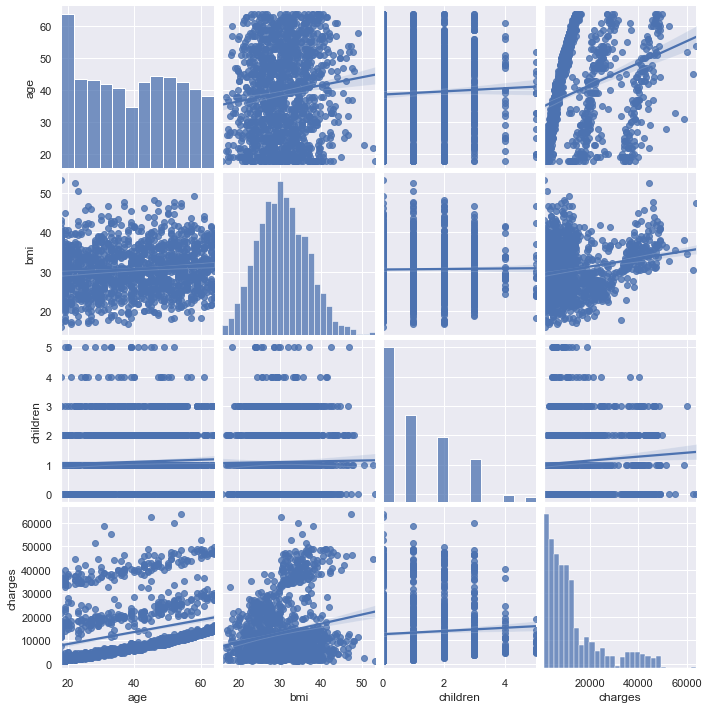

In [70]:
sns.pairplot(DataSet,kind = 'reg')

##### Observations
Pairplot to show the relationship between the different variables. It is a more graphical representation of the Correlation Heat Map. 

<u><b> SEX V/S REGION </b></u>

Text(0, 0.5, 'Frequency')

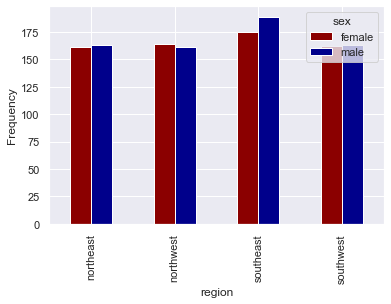

In [83]:
tab1 = pd.crosstab(DataSet['region'],DataSet['sex'])
t1color = ['darkRed','darkblue']
tab1.plot.bar(color=t1color)
plt.ylabel("Frequency")

##### Observations
- The Male insurance beneficiaries exceed the Female ones in all regions except one (North West). <br>
- The region that most beneficiaries reside in is South East.<br>

<u><b> REGION V/S SMOKER</b></u>

Text(0, 0.5, 'Frequency')

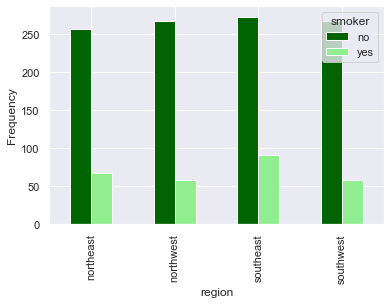

In [86]:
tab2 = pd.crosstab(DataSet['region'],DataSet['smoker'])
t2color = ['darkgreen','lightgreen']
tab2.plot.bar(color=t2color)
plt.ylabel("Frequency")

##### Observations
- While the non smoking population is relatively equal in all 4 regions; the smoking population has an elevated difference with SouthEast having the most, followed by NorthEast at 2nd place and NorthWest and SouthWest placed 3rd with relatively equal distribution. 

<u><b> SEX V/S SMOKER </b></u>

Text(0, 0.5, 'Frequency')

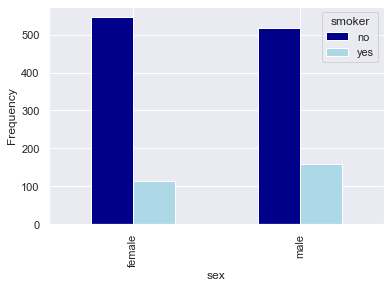

In [126]:
tab3 = pd.crosstab(DataSet['sex'],DataSet['smoker'])
t3color = ['darkblue','lightblue']
tab3.plot.bar(color = t3color)
plt.ylabel("Frequency")

##### Observations
- SMOKER : More Male Policy Holders than Female. <br>
- NON-SMOKER : More Female Policy Holders then Male.<br>

<u><b> CHILDREN V/S SMOKER</b></u>

Text(0, 0.5, 'Frequency')

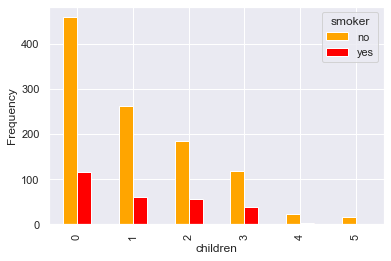

In [125]:
tab4 = pd.crosstab(DataSet['children'],DataSet['smoker'])
t4color = ['orange','red']
tab4.plot.bar(color = t4color)
plt.ylabel("Frequency")

##### Observations
- As the number of children / dependants increase; there is a decline in the smoking population. 
- There are no smoking policy holders with 4 or 5 children / dependants.

<u><b> BMI V/S AGE </b></u>

<AxesSubplot:xlabel='age', ylabel='bmi'>

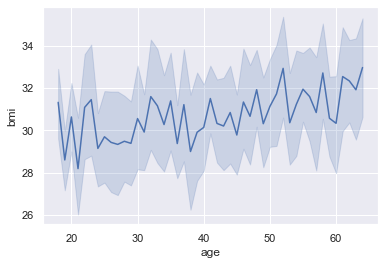

In [167]:
sns.lineplot(y='bmi',x='age',data=DataSet)

##### Observations
- On an average; as Age increases the BMI also increases. 

<u><b> CHARGES V/S REGION</b></u>

<AxesSubplot:xlabel='region', ylabel='charges'>

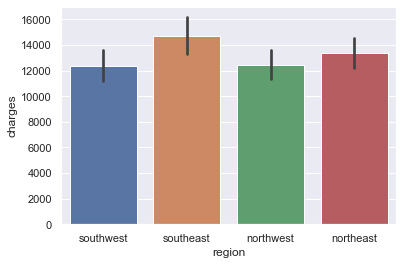

In [165]:
sns.barplot(y='charges',x='region',data=DataSet)

##### Observations
- The SouthEast region has the highest charges followed by NorthEast. SouthWest and NorthWest are next with relatively same average charges.

<u><b> CHILDREN V/S REGION </b></u>

Text(0, 0.5, 'Frequency')

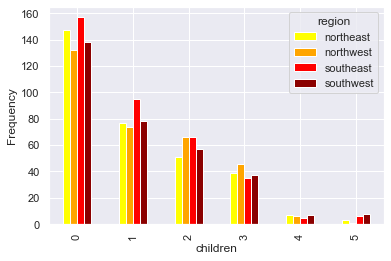

In [133]:
tab5 = pd.crosstab(DataSet['children'],DataSet['region'])
t5color = ['yellow','orange','red','darkred']
tab5.plot.bar(color = t5color)
plt.ylabel("Frequency")

##### Observations
- SouthEast Region has the highest policyholders with 0, 1 or 2 children / dependants. 
- SouthWest Region as compared to the other regions, policyholders have less number of children / dependants.
- The NorthEast region has a higher number of policyholders with 0 children / dependants but the number falls as the children / dependants increase.
- The NorthWest region has no policyholders with 5 children / dependants. 

<u><b> CHILDREN V/S CHARGES </b></u>

<AxesSubplot:xlabel='children', ylabel='charges'>

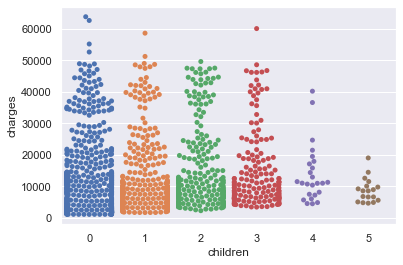

In [186]:
sns.swarmplot(DataSet['children'],DataSet['charges'])

##### Observations
- Data on Policy Holders decreases as Number of Children / Dependants Increases,<br>
- The highest charges come from Policy Holders with 0 children / dependants and seems to decrease as children/dependants increase

<u><b> AGE V/S CHARGES </b></u>

<AxesSubplot:xlabel='age', ylabel='charges'>

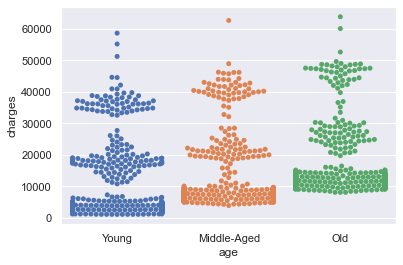

In [232]:
sns.swarmplot(Data['Age-Bin'],DataSet['charges'])

##### Observations
- Older Policy Holders have significantly more charges than the Younger Policy Holders
- As Age increases, charges increases. 

<u><b> SMOKER V/S CHARGES </b></u>

Text(0.5, 1.0, 'Smoker v/s Charges')

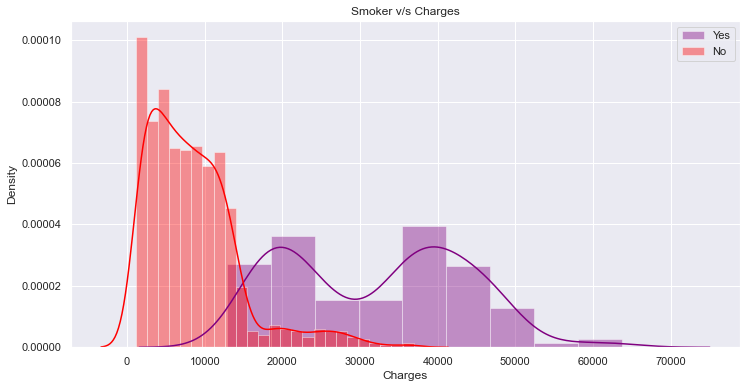

In [308]:
Smoker_Yes = np.array(DataSet[DataSet['smoker'] == 'yes']['charges'])
Smoker_No = np.array(DataSet[DataSet['smoker'] == 'no']['charges'])

fig = plt.figure(figsize = (12,6))
sns.distplot(Smoker_Yes,color='purple',label='Yes')
sns.distplot(Smoker_No,color='red',label='No')
plt.legend()
plt.xlabel("Charges")
plt.title("Smoker v/s Charges")


##### Observations
- The Smoking Policy Holders have comparatively higher charges than the Non - Smoking Policy Holders

<u><b> SMOKER V/S BMI </b></u>

Text(0.5, 1.0, 'Smoker v/s BMI')

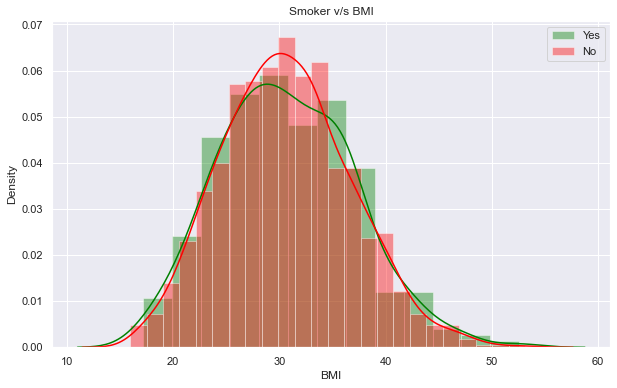

In [213]:
Smoke_Yes = np.array(DataSet[DataSet['smoker'] == 'yes']['bmi'])
Smoke_No = np.array(DataSet[DataSet['smoker'] == 'no']['bmi'])


fig = plt.figure(figsize = (10,6))
sns.distplot(Smoke_Yes,color='green',label='Yes')
sns.distplot(Smoke_No,color='red',label='No')
plt.legend()
plt.xlabel("BMI")
plt.title("Smoker v/s BMI")


##### Observations
- The Smoking Policy Holder's and Non - Smoking Policy Holder's BMI Distribution does not vary significantly and is more or less the same.

## Multivariate Analysis of Variables

<u><b> REGION V/S BMI V/S SMOKER </b></u>

<AxesSubplot:xlabel='region', ylabel='bmi'>

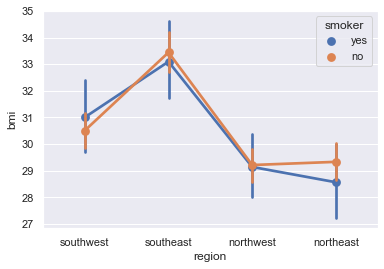

In [135]:
sns.pointplot(DataSet['region'],DataSet['bmi'],hue = DataSet['smoker'])

##### Observations
- <u>SOUTH-EAST</u> : Has the highest range of BMI when compared to other regions. Non-Smokers have higher BMI than the Smokers.
- <u>SOUTH-WEST</u> : Second Highest Range for BMI when compared to other regions. Smokers have higher BMI than the Non-Smokers.
- <u>NORTH-WEST</u> : Third Highest Range for BMI when compared to other regions. Smokers and Non-Smokers have relatively the same BMI.
- <u>NORTH-EAST</u> : Lowest Range for BMI when comapared to the other regions. Non-Smokers have significantly higher BMI than the Smokers.

<u><b> CHARGES V/S AGE V/S SMOKER </b></u>

<Figure size 720x720 with 0 Axes>

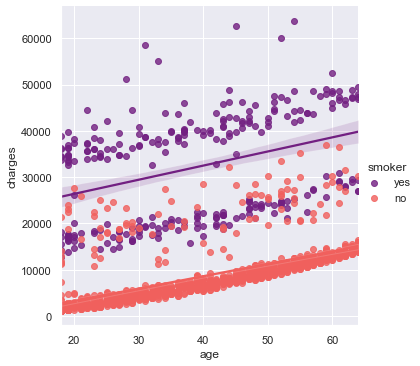

In [160]:
figure = plt.figure(figsize=(10,10))
sns.lmplot(x='age',y='charges',hue = 'smoker',data=DataSet, palette="magma")

##### Observations
- With the rise of age, the charges also rise.
- The Smoking Policy Holders have higher Charges than the Non - Smoking Policy Holders

<u><b> REGION V/S SMOKER V/S SEX </b></u>

<Figure size 1080x1080 with 0 Axes>

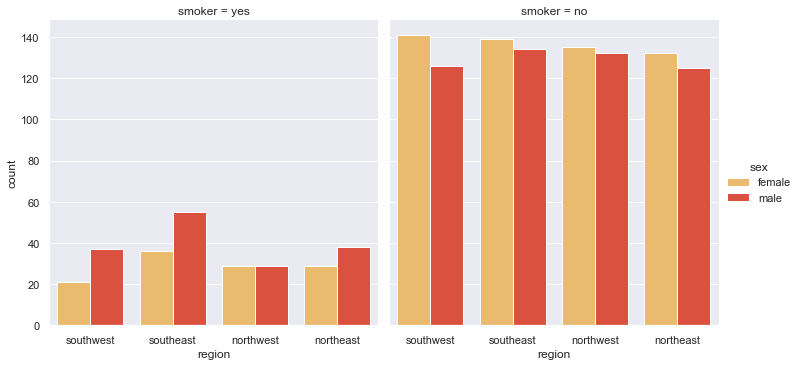

In [217]:
plt.figure(figsize=(15,15))
sns.catplot(x='region', col='smoker',hue = "sex",kind="count", data=DataSet, palette="YlOrRd") 

##### Observations
- <u>SMOKERS</u> : North-West has equal Male and Female Smokers while all other regions have more Male Smokers than Female.
- <u>NON-SMOKERS</u> : All regions have more Female Non-Smokers than Male ones. 


<u><b> BMI V/S CHILDREN V/S SMOKER </b></u>

<AxesSubplot:xlabel='children', ylabel='bmi'>

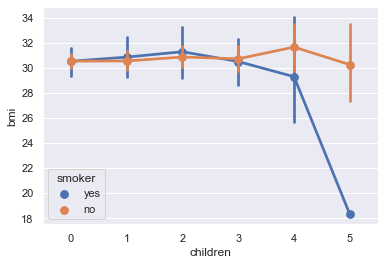

In [139]:
sns.pointplot(DataSet['children'],DataSet['bmi'],hue = DataSet['smoker'])

##### Observations
- <u>SMOKERS</u> : As the number of children/dependants increase from 0 to 3; BMI is in the range of 28 to 33. On further increase to 4, it drops to 28-30 and there is a sharp drop when it reaches 5 children/dependants to 18
- <u>NON-SMOKERS</u> : BMI averages on the range of 28 - 33 for any number of children. 


<u><b> AGE V/S BMI V/S SEX </b></u>

<AxesSubplot:xlabel='age', ylabel='bmi'>

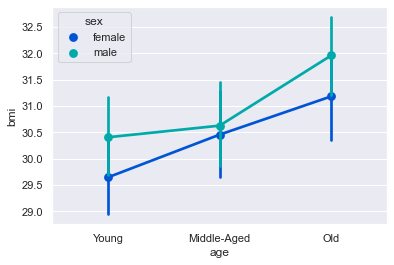

In [225]:
sns.pointplot(Data['Age-Bin'],DataSet['bmi'],hue = DataSet['sex'], palette='winter')

##### Observations
- Males have a higher BMI than Females across all ages.
- BMI Increases as Age increases.


<u><b> CHARGES V/S REGION V/S AGE </b></u>

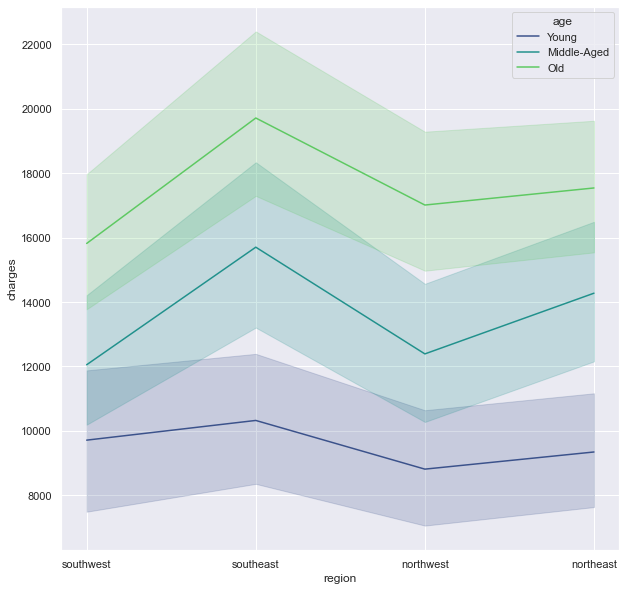

In [291]:
figure = plt.figure(figsize=(10,10))
ax = sns.lineplot(y=DataSet['charges'],x=DataSet['region'],hue=Data['Age-Bin'], palette = 'viridis')

##### Observations
- <u>YOUNG</u> : Charges range from 8000 to 12,000 with all 4 regions having similar averages with slight margins.
- <u>MIDDLE AGED</u> : Charges range from 10,000 to 18,000. Steep Differences in the average charges of the 4 regions.
- <u>OLD</u> : Charges range from 14,000 to 23,000. Steep Differences in the average charges of the 4 regions.


<u><b> PANDAS AUTO GENERATED PROFILE FOR REFERENCE </b></u>

In [175]:
pandas_profiling.ProfileReport(DataSet)

### Key Insights based on EDA
- Age has the maximum concentration in the range of 20 to 30 years, implying that most customers are in that age range. <br>
- Most people have their BMI in the late 20's and early 30's.
- A Large number of people have no children with very few having over 3 children.
- Most charges are in the range of 0 - 20,000 dollars; with comparatively less cases above that range. 
- The DataSet has a higher concentration of Young Policy Holders with Middle-Aged and Old policyholders having relatively the same concentration.
- The Dataset is almost evenly distributed between Male and Female with Male leading only by a very small margin
- Most people have no children. Almost 50% of the population has 1, 2 or 3 kids. Less than 4% have 4 or 5 kids.
- Almost 80 percent of the people in the dataset do not smoke. Only 20% do.
- The entire dataset seems to be evenly distributed amongst the 4 regions. South - East leads by a very small margin of approximately 3 percent.
- There is very little to negligible correlation between the attributes of this dataset.
- The Male insurance beneficiaries exceed the Female ones in all regions except one (North West).
- The region that most beneficiaries reside in is South East.
- While the non smoking population is relatively equal in all 4 regions; the smoking population has an elevated difference with SouthEast having the most, followed by NorthEast at 2nd place and NorthWest and SouthWest placed 3rd with relatively equal distribution.
- SMOKER : More Male Policy Holders than Female; NON-SMOKER : More Female Policy Holders then Male.
- As the number of children / dependants increase; there is a decline in the smoking population.
- There are no smoking policy holders with 4 or 5 children / dependants.
- On an average; as Age increases the BMI also increases.
- The SouthEast region has the highest charges followed by NorthEast. SouthWest and NorthWest are next with relatively same average charges.
- The highest charges come from Policy Holders with 0 children / dependants and seems to decrease as children/dependants increase
- The Smoking Policy Holders have comparatively higher charges than the Non - Smoking Policy Holders
- The Smoking Policy Holder's and Non - Smoking Policy Holder's BMI Distribution does not vary significantly and is more or less the same.
- SMOKERS : North-West has equal Male and Female Smokers while all other regions have more Male Smokers than Female; NON-SMOKERS : All regions have more Female Non-Smokers than Male ones.
- Males have a higher BMI than Females across all ages.
- BMI Increases as Age increases.
- YOUNG : Charges range from 8000 to 12,000 with all 4 regions having similar averages with slight margins.
- MIDDLE AGED : Charges range from 10,000 to 18,000. Steep Differences in the average charges of the 4 regions.
- OLD : Charges range from 14,000 to 23,000. Steep Differences in the average charges of the 4 regions.

### Recommendations based on EDA
- As the Smoking population has higher charges; the insurance company can charge them higher premiums to keep up with the costs as well as discourage smoking.
- More targeted marketing can be done on Young People to encourage them to buy insurances as currently there are less Young People with Insurances.
- Targeted marketing for women and their children so as to encourage them to invest in insurances not only for themselves but their kids as well.
- A insurance policy with an added benefit of a gym membership to those customers with higher BMI to encourage them to bring their BMI to acceptable levels as well as encourage more people to invest in Insuarances. 
- Personalized and dedicated policies for people with more children/dependants to fit their needs. 
- More Marketing in regions where there aren't as many policyholders. It can also be personalized to fit the disasters that are usually encountered in that are to increase subscription. 


## Statistical Analysis 

<u><b> QUESTION 1 </b></u><br>
<b>PROVE (OR DISPROVE) THAT THE MEDICAL CLAIMS MADE BY THE PEOPLE WHO SMOKE IS GREATER THAN THOSE WHO DON'T?</b>

Through this we aim to understand if smoking has any affect on the medical claims (charges) made by the policy holders.<br>
The SMOKERS V/S CHARGES graph in BIVARIATE ANALYSIS did show a difference in the claims made by smokers and Non Smokers.<br> We will now test it statistically using 2 SAMPLE INDEPENDENT T TEST
<br>



<i><u> NULL HYPOTHESIS(H0) </u></i> : Charges of Smoker and Non-Smoker are SAME. <br>
<i><u> ALTERNATE HYPOTHESIS (Ha) </u></i> : Charges of Smoker is GREATER than the charges of Non-Smoker.

In [304]:
Smoker_Yes = np.array(DataSet[DataSet['smoker'] == 'yes']['charges'])
Smoker_No = np.array(DataSet[DataSet['smoker'] == 'no']['charges'])

test_stat, p_value  = stats.ttest_ind(Smoker_Yes,Smoker_No)
#test_stat, p_value  = stats.ttest_ind(Smoker_Yes,Smoker_No,alternative='greater')
print('The p value is = ' + str(p_value))

if p_value < 0.05: # As significance level = 0.05
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null hypothesis (Accept Null Hypothesis)")

The p value is = 8.271435842177219e-283
Reject Null Hypothesis


##### Observations
Alternate Hypothesis Accepted : Charges of Smoker is GREATER than the charges of Non-Smoker.

<u><b> QUESTION 2 </b></u><br>
<b>PROVE (OR DISPROVE) WITH STATISTICAL EVIDENCE THAT THE BMI OF FEMALES IS DIFFERENT FROM THAT OF MALES?</b>

Through this we aim to understand if the BMI of Females and Males is different on comparison. In other words, does sex have an effect on BMI? <br>
GRAPHICALLY:

Text(0.5, 1.0, 'BMI v/s SEX')

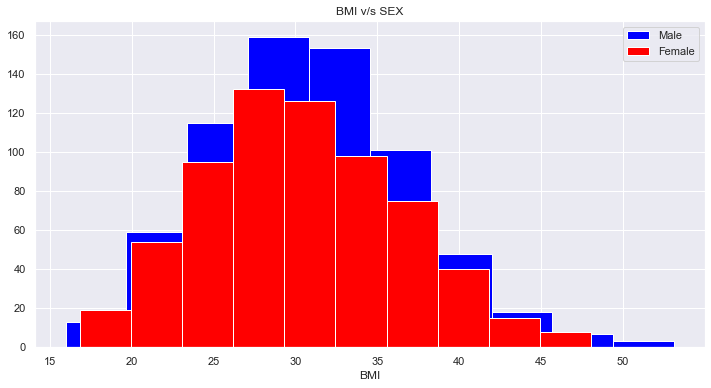

In [323]:
BMI_Male = np.array(DataSet[DataSet['sex'] == 'male']['bmi'])
BMI_Female = np.array(DataSet[DataSet['sex'] == 'female']['bmi'])

fig = plt.figure(figsize = (12,6))
plt.hist(BMI_Male,color='blue',label='Male')
plt.hist(BMI_Female,color='red',label='Female')
plt.legend()
plt.xlabel("BMI")
plt.title("BMI v/s SEX")

There doesn't seem to be a huge difference graphically.<br>
Lets analyze this Statistically using 2 SAMPLE INDEPENDENT T TEST <br>
<i><u> NULL HYPOTHESIS(H0) </u></i> : BMI of Females is NOT DIFFERENT than that of Males <br>
<i><u> ALTERNATE HYPOTHESIS (Ha) </u></i> : BMI of Females IS DIFFERENT from that of Males.<br>

In [324]:
test_stat1, p_value1  = stats.ttest_ind(BMI_Male,BMI_Female)
print('The p value is = ' + str(p_value1))

if p_value1 < 0.05: # As significance level = 0.05
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null hypothesis (Accept Null Hypothesis)")

The p value is = 0.08997637178984932
Fail to reject Null hypothesis (Accept Null Hypothesis)


##### Observations
Null Hypothesis Accepted : BMI of Females is NOT DIFFERENT than that of Males

<u><b> QUESTION 3 </b></u><br>
<b>IS THE PROPORTION OF SMOKERS SIGNIFICANTLY DIFFERENT ACROSS REGIONS?</b>


Through this we aim to understand if Smoking Population of policy holders is significantly different in the 4 regions<br>
The REGION V/S SMOKERS graph in BIVARIATE ANALYSIS did not show a significant difference in the Smoking Population of the 4 regions. <br>
We will now test it statistically using CHI SQUARE TEST OF INDEPENDENCE<br>
<i><u> NULL HYPOTHESIS(H0) </u></i> : Proportion of Smokers is NOT significantly different across regions.<br>
<i><u> ALTERNATE HYPOTHESIS (Ha) </u></i> : Proportion of Smokers IS significantly different across regions.<br>

In [332]:
tab2 = pd.crosstab(DataSet['region'],DataSet['smoker'])
tab2

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


In [346]:
from scipy.stats import chi2_contingency
chi, p_value2, dof, expected = chi2_contingency(tab2)
print('The p value is = ' + str(p_value2))

if p_value2 < 0.05: # As significance level = 0.05
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null hypothesis (Accept Null Hypothesis)")

The p value is = 0.06171954839170541
Fail to reject Null hypothesis (Accept Null Hypothesis)


##### Observations
Null Hypothesis Accepted : Proportion of Smokers is NOT significantly different across regions.

<u><b> QUESTION 4 </b></u><br>
<b>IS THE MEAN BMI OF WOMEN WITH NO CHILDREN, ONE CHILD AND TWO CHILDREN THE SAME? EXPLAIN YOUR ANSWER WITH STATISTICAL EVIDENCE</b>


Through this we aim to understand if the BMI of women changes with respect to increasing number of children.<br>
GRAPHICALLY:

<AxesSubplot:xlabel='children', ylabel='bmi'>

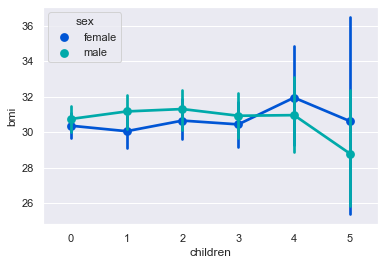

In [336]:
sns.pointplot(DataSet['children'],DataSet['bmi'],hue = DataSet['sex'], palette='winter')

From the range of 0 - 2 children; women do not show significant difference in their mean BMI. <br>
Lets analyse this statistically with ONE WAY ANOVA TEST using f_oneway<br><br>
<b>f_oneway:</b><br>
<i>The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.</i><br>
<br>
<i><u> NULL HYPOTHESIS(H0) </u></i> : Mean BMI of women with no children, one child and two children is SAME. <br>
<i><u> ALTERNATE HYPOTHESIS (Ha) </u></i> : Mean BMI of women with no children, one child and two children is NOT SAME. <br>

In [347]:
women_df = DataSet[DataSet['sex']=='female']

ZeroChi = np.array(women_df[women_df['children'] == 0 ]['bmi'])
OneChi = np.array(women_df[women_df['children'] == 1 ]['bmi'])
TwoChi = np.array(women_df[women_df['children'] == 2 ]['bmi'])

f_stat, p_value3 = stats.f_oneway(ZeroChi,OneChi,TwoChi)
print('The p value is = ' + str(p_value3))
print('The f statistic value is = ' + str(f_stat))

if p_value3 < 0.05: # As significance level = 0.05
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null hypothesis (Accept Null Hypothesis)")

The p value is = 0.7158579926754841
The f statistic value is = 0.3344720147757968
Fail to reject Null hypothesis (Accept Null Hypothesis)


##### Observations
Null Hypothesis Accepted : Mean BMI of women with no children, one child and two children is SAME.